## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation='relu', 
                                   name='hidden_layer'+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(x)
            x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

results = {}
model = build_mlp(x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in [10,25]:
    earlystop = EarlyStopping(monitor="val_loss", 
                              patience=i, 
                              verbose=1)
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=[x_test, y_test],
              shuffle=True,
              callbacks=[earlystop])
    
    tag_name = 'Early Stop in Patience: %s' % str(i)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    results[tag_name] = {'train_loss':train_loss,
                         'valid_loss':valid_loss,
                         'train_acc':train_acc,
                         'valid_acc':valid_acc,}
    


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

50000/50000 [==============================] - 3s 59us/step - loss: 0.6063 - accuracy: 0.8182 - val_loss: 1.6089 - val_accuracy: 0.4881
Epoch 12/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.5877 - accuracy: 0.8250 - val_loss: 1.6224 - val_accuracy: 0.4845
Epoch 13/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.5722 - accuracy: 0.8297 - val_loss: 1.6310 - val_accuracy: 0.4897
Epoch 14/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.5547 - accuracy: 0.8377 - val_loss: 1.6531 - val_accuracy: 0.4849
Epoch 15/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.5396 - accuracy: 0.8415 - val_loss: 1.6625 - val_accuracy: 0.4905
Epoch 16/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.5221 - accuracy: 0.8495 - val_loss: 1.6648 - val_accuracy: 0.4887
Epoch 17/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.5036 - accuracy: 0.8582 - val_loss: 1.6848

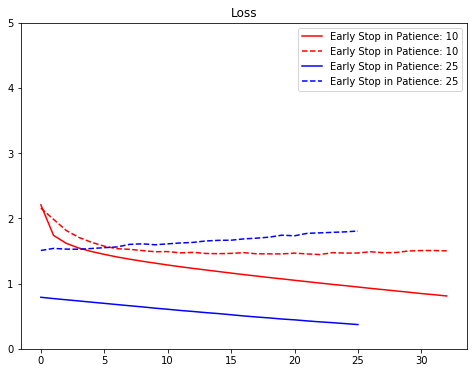

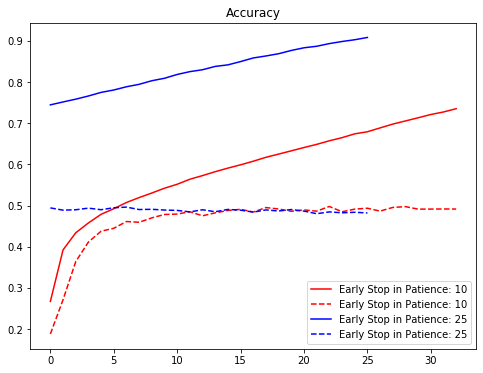

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as mplcm
import matplotlib.colors as colors
"""Code Here
將結果繪出
"""
color_bar = ['r', 'b', 'g', 'purple']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()